# Dataset avvistamenti UFO

**Attenzione**: Nelle date (campo 'datetime') è presente anche come ora 24:xx che però causa problemi con 
        tutto quello che parsa le date. Ho fatto 'sostituisci tutto' 24 -> 00 ma non è proprio corretto
        perchè bisogna anche aumentare il giorno  
**Attenzione**: Il file 'sample.csv' è il dataset 'scrubbed.csv' ma con solo 1 riga ogni 10, è meglio per testare visto che il dataset originale sono circa 80000 righe e ci mette molto per calcolare alcune cose

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
DATASET = 'sample_ufos.csv'
data = pd.read_csv(DATASET)

In [16]:
data.keys()

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')

## Avvistamenti per ora del giorno
Qui c'è il codice per generare i grafici del numero di avvistamenti per ora del giorno. Sono più esperimenti, ci sono con tutte le ore specificate oppure con intervalli di 3 ore (leggermente shiftati per avere le 12:00 al centro).
Per modificare i colori cambiate la variabile 'gradients'

In [7]:
# Questo è leeeento
data['datetime'] = pd.to_datetime(data['datetime'])

In [8]:
counts = data['datetime'].dt.hour.value_counts()

In [9]:
hour_groups = [[23, 0, 1]] + [[h, h+1, h+2] for h in range(2, 23, 3)]
def find_group(hour):
    for i, g in enumerate(hour_groups):
        if hour in g: return i
    return -1
dt = data['datetime']
grouped_hours = dt.groupby(lambda i: find_group(dt.iloc[i].hour))

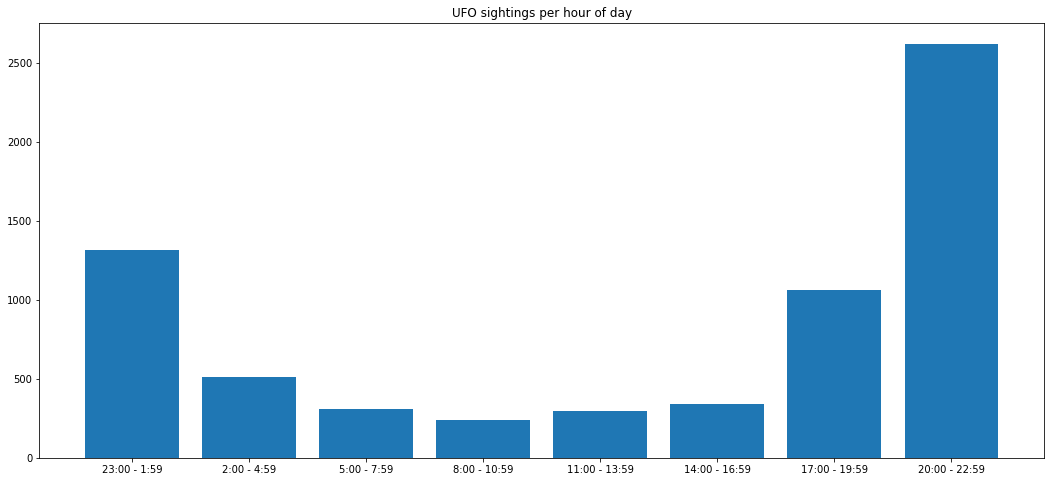

In [10]:
# Grafico degli avvistamenti per ora del giorno (a colori)
grouped_hours_counts = grouped_hours.size()

plt.figure(figsize=(18, 8))
plt.title('UFO sightings per hour of day')
bars = plt.bar(grouped_hours_counts.index, grouped_hours_counts.get_values())
labels = [f'{starth}:00 - {endh}:59' for (starth, _, endh) in hour_groups]
plt.xticks(range(len(labels)), labels)

plt.show()

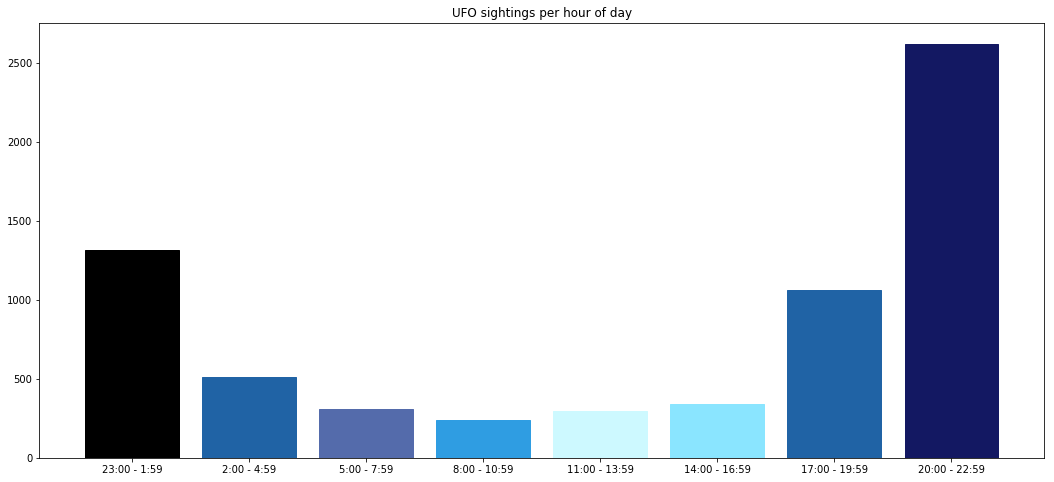

In [11]:
gradients = [
    (0, 0, 0),      # 23:00 -  1:59
    (32,99,165),    #  2:00 -  4:59
    (84, 107, 171),       #  5:00 - 7:59
    (47,157,226),      #  8:00 - 10:59
    (205,249,255),     # 11:00 - 13:59
    (138,229,255),     # 14:00 - 16:59
    (32,99,165),       # 17:00 - 19:59
    (19, 24, 98)# (84, 107, 171)     # 20:00 - 22:59
]
gradients = [(r/255, g/255, b/255, 1.0) for (r, g, b) in gradients]

plt.figure(figsize=(18, 8))
plt.title('UFO sightings per hour of day')
bars = plt.bar(grouped_hours_counts.index, grouped_hours_counts.get_values())
labels = [f'{starth}:00 - {endh}:59' for (starth, _, endh) in hour_groups]
plt.xticks(range(len(labels)), labels)

for bar_i, index in enumerate(grouped_hours_counts.index):
    bars[bar_i].set_color(gradients[index])
plt.show()

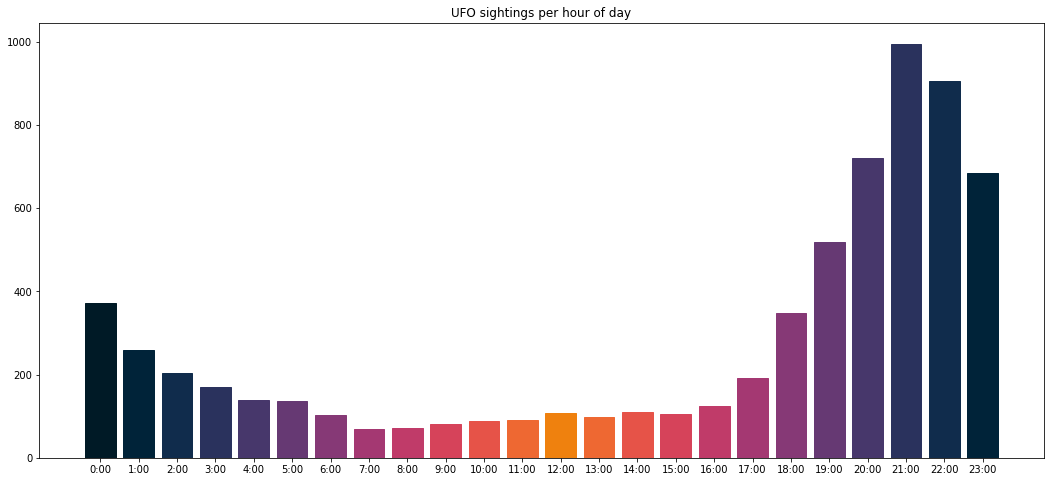

In [12]:
# VERSIONE 24 ORE
# Grafico degli avvistamenti per ora del giorno (con colori)
gradients = [
    (0, 26, 38), (0, 35, 57), (16, 44, 76), (42, 50, 93), 
    (71, 55, 107), (102, 57, 115), (134, 57, 118), (164, 56, 114), 
    (192, 59, 105), (214, 67, 90), (230, 83, 72), (238, 104, 50), 
    (239, 129, 14)
]
gradients = [(r/255, g/255, b/255, 1.0) for (r, g, b) in gradients]
gradients = gradients + list(reversed(gradients[:-1]))

# dalle 0:00 alle 23:00
g2 = [
    (0, 26, 38), (0, 26, 38), (7, 29, 37), (32, 40, 35), 
    (82, 61, 30), (109, 73, 27), (146, 89, 23), (159, 95, 22), 
    (171, 100, 21), (184, 105, 20), (196, 110, 18), (209, 116, 17), 
    (237, 128, 14), (209, 116, 17), (196, 110, 18), (184, 105, 20), 
    (171, 100, 21), (159, 95, 22), (146, 89, 23), (109, 73, 27), 
    (82, 61, 30), (32, 40, 35), (7, 29, 37), (0, 26, 38)
]
g2 = [(r/255, g/255, b/255, 1.0) for (r, g, b) in g2]

plt.figure(figsize=(18, 8))
plt.title('UFO sightings per hour of day')
bars = plt.bar(counts.index, counts.get_values())
labels = [f'{h}:00' for h in range(0, 24)]
plt.xticks(range(len(labels)), labels)

for bar_i, index in enumerate(counts.index):
    bars[bar_i].set_color(gradients[index])
plt.show()

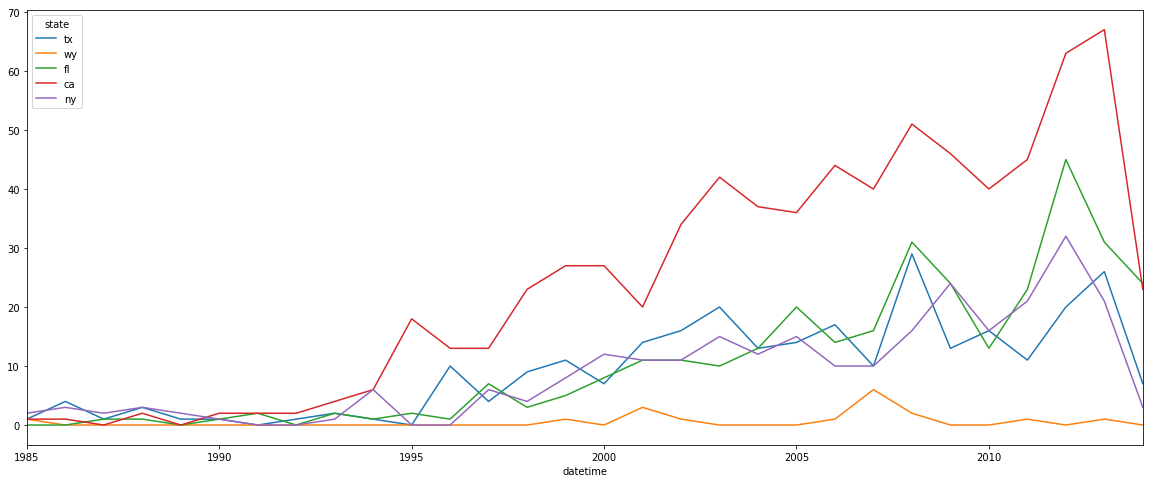

In [13]:
# ricordati di normalizzare per popolazione. però
# cmq sembrano sensati con le popolazioni degli stati
us_sightings = data[pd.notnull(data['state']) & (data['country'] == 'us')]
states_to_consider = ['tx', 'wy', 'fl', 'ca', 'ny']
ct = pd.crosstab(us_sightings['datetime'].dt.year, us_sightings['state']).loc[:, states_to_consider]

fig = ct.plot(figsize=(20, 8), xlim=(1985, 2014))
plt.show()

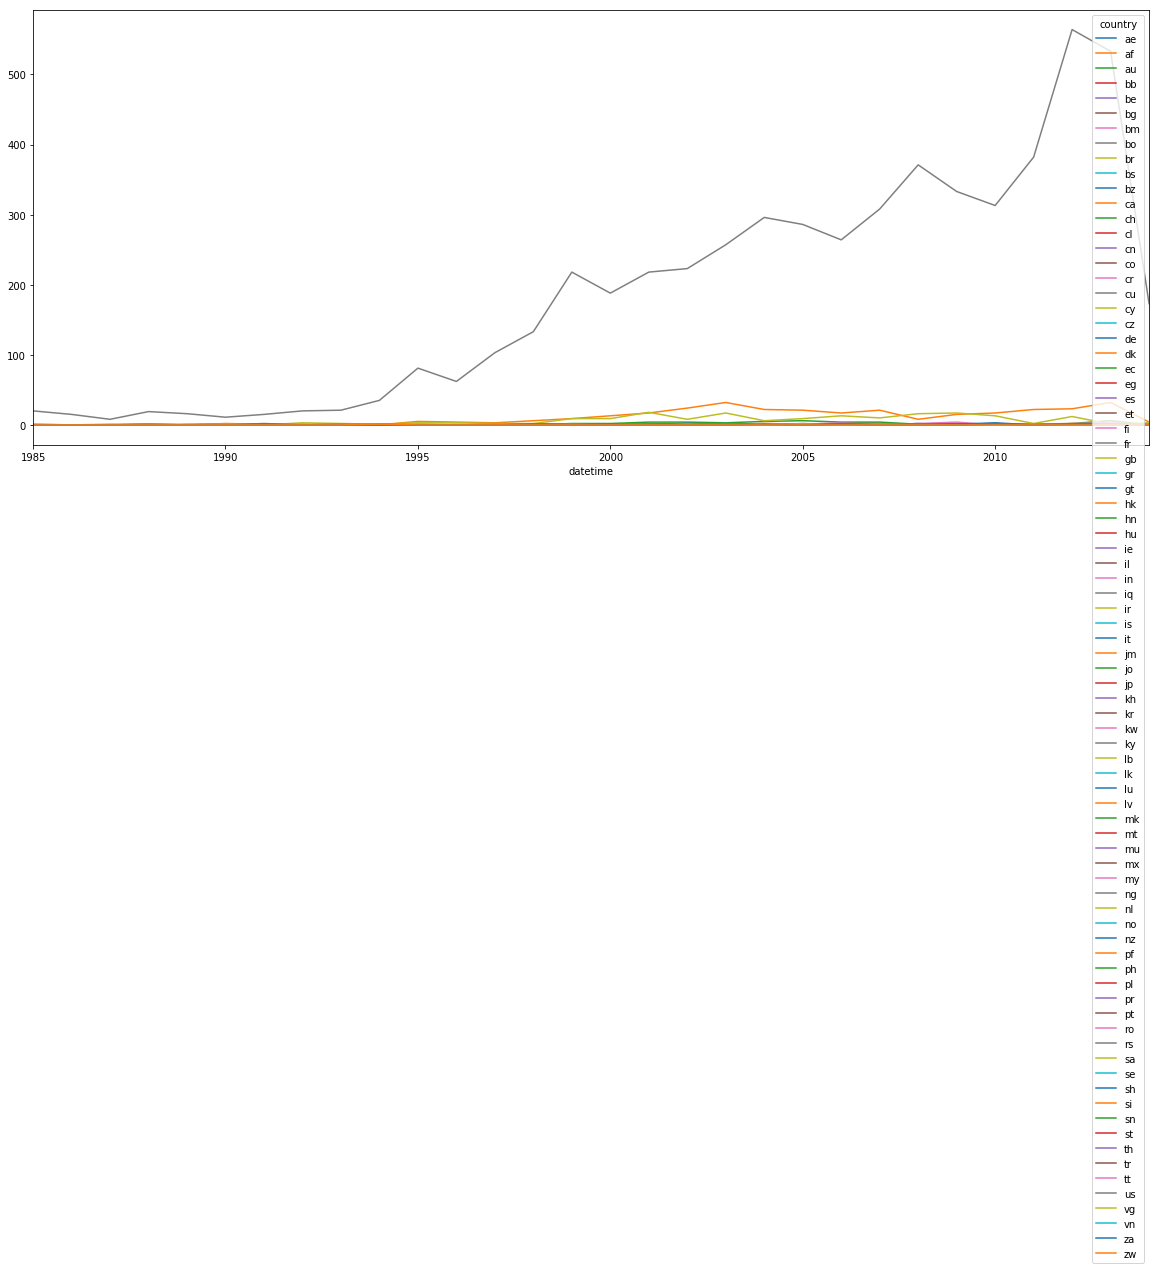

In [55]:
# ricordati di normalizzare per popolazione. però
# cmq sembrano sensati con le popolazioni degli stati

countries_to_consider = ['tx', 'wy', 'fl', 'ca', 'ny']


countries_data = pd.crosstab(
    data['datetime'].dt.year, 
    data['country']
)



fig = countries_data.plot(figsize=(20, 8), xlim=(1985, 2014))
plt.show()

In [56]:
for c in "cn,in,us,id,pk,br,ng,bd,ru,mx,jp,ph,eg,et,vn,cg,ir,tr,de,fr,it".split(','):
    if c not in countries_data.columns: print(c)
'us' in countries_data.columns

id
pk
bd
ru
cg


True